# Data Science Case: Starter Notebook

In [1]:
TEAM_PASSWORD = 'UpI7omaywRqCblA' # fill in
PORT = 8082 # fill in

## Download data

In [8]:
import urllib.request

rounds = ['0', '1', '2', '3']

ROUND_NAME_TO_ID = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3
}

def download_train(round_name):
    round_id = ROUND_NAME_TO_ID[round_name]
    url = f'http://3.95.7.226:{PORT}/results/{TEAM_PASSWORD}/round/{round_id}/train.csv'
        
    print(f'Downloading from {url}')
    urllib.request.urlretrieve(url, f'train_{round_name}.csv')

download_train('0')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Read train data

,Stock1,Stock2,Stock1_Delay,Stock2_Delay
0,1479.36,1088.26,1481.40,1094.60
1,1479.33,1087.03,1479.36,1088.26
2,1479.72,1087.16,1479.33,1087.03
3,1477.47,1077.92,1479.72,1087.16
4,1474.91,1076.45,1477.47,1077.92
...,...,...,...,...
995,678.96,973.87,679.63,974.69
996,678.27,975.92,678.96,973.87
997,677.75,968.82,678.27,975.92
998,676.73,967.26,677.75,968.82


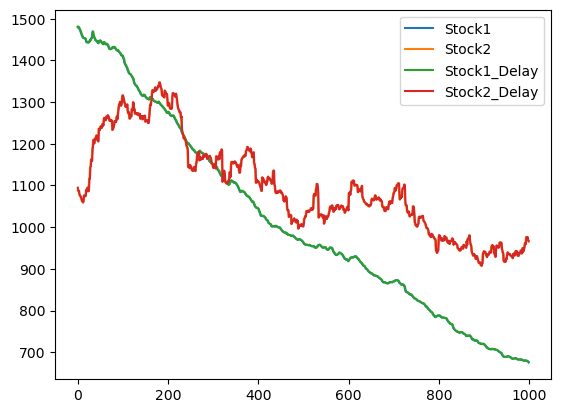

In [20]:
df = pd.read_csv('train_0.csv', index_col=None)[["Stock1","Stock2","Stock1_Delay","Stock2_Delay"]]
df.plot()
df

In [25]:
df["short"] = (df["Stock1"] - df["Stock1_Delay"]).sum()
df["short"].describe()

count    1.000000e+03
mean    -8.061000e+02
std      1.444545e-11
min     -8.061000e+02
25%     -8.061000e+02
50%     -8.061000e+02
75%     -8.061000e+02
max     -8.061000e+02
Name: short, dtype: float64

## Basic Plotting

In [17]:
df['Stock1Rets'] = df['Stock1'].pct_change()
df['Stock2Rets'] = df['Stock2_Delay'].pct_change()
df = df.dropna()

<AxesSubplot:xlabel='Stock1Rets', ylabel='Stock2Rets'>

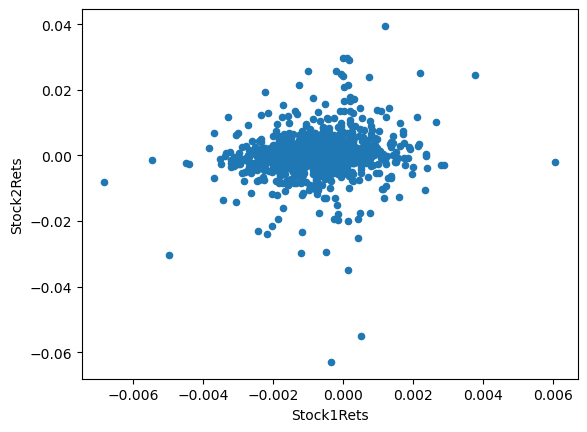

In [18]:
df.plot.scatter('Stock1Rets', 'Stock2Rets')

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

beta: 0.9303080836958989
intercept: [0.00063008]
In sample R2: 0.02361614059529049


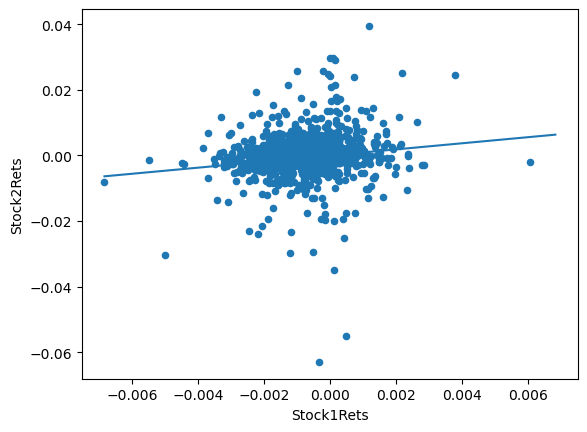

In [19]:
model = LinearRegression()
X = df[['Stock1Rets']].to_numpy()
Y = df[['Stock2Rets']].to_numpy()
model.fit(X, Y)

beta = model.coef_[0,0]
intercept = model.intercept_

ax = df.plot.scatter('Stock1Rets', 'Stock2Rets')
x_bound = np.max(np.abs(X))
ax.plot([-x_bound, x_bound], [-x_bound * beta, x_bound * beta])



print(f'beta: {beta}')
print(f'intercept: {intercept}')

print(f'In sample R2: {model.score(X, Y)}')